# SciPy Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basic

### Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2    # defining the function

res = minimize(f, 1)    # giving an initial guess, can be any value
res.x    # gives an array

array([2.99999998])

In [4]:
res.x[0]   # taking the value of x

2.9999999820005776

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to $$x-2y+2 \geq 0 $$$$-x-2y+6 \geq 0$$$$-x + 2y + 2 \geq 0$$$$x \geq 0 $$$$y \geq 0 $$
![opt_reg](img/optimization/opt_reg.png)
* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular

In [23]:
# defining the equation in a variable
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2    # x[0], x[1] represent x and y axis respectively

# giving the constraints in a tuple of dictionary
cons =  ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
                {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
                {'type': 'ineq', 'fun': lambda x: -x[0] + 2*x[1] + 2})

# giving the boundaries where None means infinity
bnds = ((0, None), (0, None))

res = minimize (f, (1, 0), bounds = bnds, constraints = cons)

res.x

array([1.39999999, 1.69999999])

In [32]:
# diff methods to minimize
minimize?

![minimize_methods](img/optimization/minimize_methods.svg)

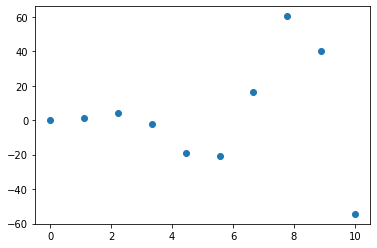

In [33]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

Now, I want to know the values in between.

In [34]:
from scipy.interpolate import interp1d    # importing the module to interpolate (joining the points)

In [40]:
f = interp1d(x, y, kind='cubic')    # we can give linear also resulting joining the points using straight lines
x_dense = np.linspace(0, 10, 100)   # there will be total of 100 points in between the 10 points. more points, better interpolation
y_dense = f(x_dense)   # will take corresponding value of x

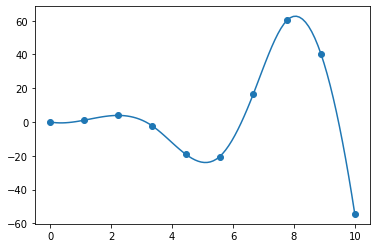

In [41]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)